# Assignment By Yang Kewen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
pd.options.display.max_columns = None

In [2]:
path = os.getcwd()

In [3]:
train = pd.read_csv(os.path.join(path, "app_train.csv"))
test = pd.read_csv(os.path.join(path, "app_test.csv"))

# Part - 1: EDA

## 1. train/test Data

In [4]:
train.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,Secondary / secondary special,Married,With parents,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,Higher education,Married,House / apartment,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


In [5]:
train.info() # there are some missing values on EXT_SCORE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61503 entries, 0 to 61502
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         61503 non-null  int64  
 1   LN_ID              61503 non-null  int64  
 2   TARGET             61503 non-null  int64  
 3   CONTRACT_TYPE      61503 non-null  object 
 4   GENDER             61503 non-null  object 
 5   NUM_CHILDREN       61503 non-null  int64  
 6   INCOME             61503 non-null  float64
 7   APPROVED_CREDIT    61503 non-null  float64
 8   ANNUITY            61502 non-null  float64
 9   PRICE              61441 non-null  float64
 10  INCOME_TYPE        61503 non-null  object 
 11  EDUCATION          61503 non-null  object 
 12  FAMILY_STATUS      61503 non-null  object 
 13  HOUSING_TYPE       61503 non-null  object 
 14  DAYS_AGE           61503 non-null  int64  
 15  DAYS_WORK          61503 non-null  int64  
 16  DAYS_REGISTRATION  615

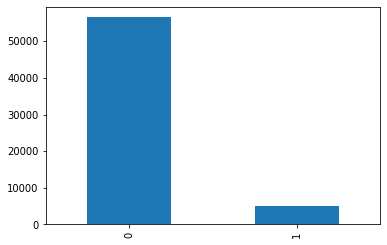

In [6]:
train.TARGET.value_counts().plot(kind = "bar") # response variable is imbalanced

### Value counts for Categorical Data

In [7]:
Cat_Columns = ["CONTRACT_TYPE", "GENDER", "INCOME_TYPE", "EDUCATION", "FAMILY_STATUS", "HOUSING_TYPE", "WEEKDAYS_APPLY", "HOUR_APPLY", "ORGANIZATION_TYPE"]
for i in Cat_Columns:
    print(i, "include: ", train[i].unique(), "\n", "And the No. of each categories are:","\n", train[i].value_counts(), "\n") 
# seems "ORGANIZATION_TYPE" includes many categories, those less occurrence categories can be lump into other category

CONTRACT_TYPE include:  ['Revolving loans' 'Cash loans'] 
 And the No. of each categories are: 
 Cash loans         55699
Revolving loans     5804
Name: CONTRACT_TYPE, dtype: int64 

GENDER include:  ['F' 'M'] 
 And the No. of each categories are: 
 F    40549
M    20954
Name: GENDER, dtype: int64 

INCOME_TYPE include:  ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Unemployed'
 'Student' 'Businessman'] 
 And the No. of each categories are: 
 Working                 31621
Commercial associate    14217
Pensioner               11249
State servant            4407
Unemployed                  5
Student                     3
Businessman                 1
Name: INCOME_TYPE, dtype: int64 

EDUCATION include:  ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 
 And the No. of each categories are: 
 Secondary / secondary special    43777
Higher education                 14887
Incomplete higher                 2045
Lower

### Visualize Distribution for continous variables

In [8]:
# sns.distplot(train["NUM_CHILDREN"],kde=False,bins=30)

In [9]:
# sns.distplot(train["INCOME"],hist=True, kde=True) # most of income range in (0, 2500000)

In [10]:
# sns.distplot(train["APPROVED_CREDIT"],hist=True, kde=True) 

In [11]:
# sns.distplot(train["ANNUITY"],hist=True, kde=True) 

In [12]:
# sns.distplot(train["PRICE"],hist=True, kde=True) 

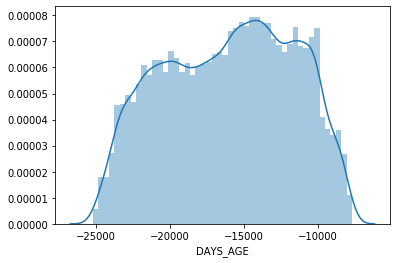

In [13]:
sns.distplot(train["DAYS_AGE"],hist=True, kde=True) 

In [14]:
train.groupby(['TARGET']).agg({'DAYS_AGE':['mean']}) # Briefly look through, old people seems to pay up loan with high chance than younger generation 

,DAYS_AGE
,mean
TARGET,
0,-16165.531185
1,-14828.157778


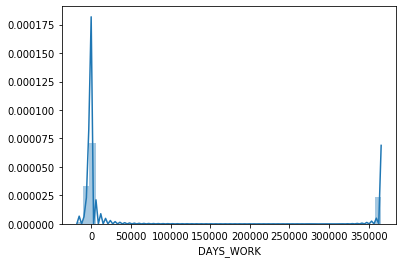

In [15]:
sns.distplot(train["DAYS_WORK"],hist=True, kde=True) 
# This is interesting as there are only two types of people,
# 1. most applicants started their jobs recently, 
# 2. the rest are very loyal workers, this factor could be very important to differentiate credit score as ppl with loyalty to their work should have higher credit 

In [16]:
# sns.distplot(train["DAYS_REGISTRATION"],hist=True, kde=True) 

In [17]:
# sns.distplot(train["DAYS_ID_CHANGE"],hist=True, kde=True) 

In [18]:
# sns.distplot(train["EXT_SCORE_1"],hist=True, kde=True) 

In [19]:
# sns.distplot(train["EXT_SCORE_2"],hist=True, kde=True) 

In [20]:
# sns.distplot(train["EXT_SCORE_3"],hist=True, kde=True) 

## 2. installment_payment Data

In [21]:
installment_payment = pd.read_csv(os.path.join(path, "installment_payment.csv"))
installment_payment.drop("Unnamed: 0", axis = 1, inplace = True)
installment_payment.head()

,SK_ID_PREV,LN_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,1137312,164489,12,-1384.0,-1417.0,5970.375,5970.375
1,2723183,112102,14,-197.0,-197.0,70.740,70.740
2,2558880,154793,8,-1262.0,-1269.0,15031.080,15031.080
3,1410565,197687,1,-1037.0,-1048.0,12514.050,12510.450
4,2391610,183431,20,-1680.0,-1693.0,7875.000,7875.000


In [22]:
print(f"Sum of null values in each feature:\n{35 * '-'}")
print(f"{installment_payment.isnull().sum()}") # only PAY_DAYS & AMT_PAY have NaN values

Sum of null values in each feature:
-----------------------------------
SK_ID_PREV       0
LN_ID            0
INST_NUMBER      0
INST_DAYS        0
PAY_DAYS       673
AMT_INST         0
AMT_PAY        673
dtype: int64


In [23]:
installment_payment[installment_payment['PAY_DAYS'].isna()] # If the people did not pay installment, then both PAY_DAYS & AMT_PAY will have NaN value      

,SK_ID_PREV,LN_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
645595,1265332,167942,5,-14.0,NaN,11650.500,NaN
645596,2776343,151961,31,-2.0,NaN,15097.275,NaN
645597,2312379,107766,46,-1464.0,NaN,67.500,NaN
645598,1319969,133112,22,-58.0,NaN,33089.310,NaN
645599,1153254,120931,26,-1440.0,NaN,67.500,NaN
...,...,...,...,...,...,...,...
2872080,1666631,429716,38,-1797.0,NaN,67.500,NaN
2872081,1280188,435393,35,-1678.0,NaN,67.500,NaN
2872192,2682640,418699,1,-24.0,NaN,42419.205,NaN
2872193,1766391,413446,45,-1668.0,NaN,67.500,NaN


#### Replace the NaN value by 0 as :
##### 1. PAY_DAYS = 0 means the ppl did not pay up till the date of current application
##### 2. AMT_PAY = 0 means the ppl did not pay up

In [24]:
installment_payment.fillna(0, inplace=True)

In [25]:
installment_payment.shape

(2872306, 7)

# 3. prev_app Data


In [26]:
prev_app = pd.read_csv(os.path.join(path, "prev_app.csv"))
prev_app.drop("Unnamed: 0", axis = 1, inplace = True)
prev_app.head(10)

,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Approved,-73,12.0,middle,365243.0,-42.0,-37.0,0.0
1,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Approved,-512,12.0,middle,365243.0,-482.0,-177.0,1.0
2,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Approved,-684,18.0,low_normal,365243.0,-654.0,-137.0,1.0
3,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Canceled,-14,NaN,NA1,NaN,NaN,NaN,NaN
4,1715995,447712,Cash loans,11368.620,270000.0,335754.0,NaN,270000.0,FRIDAY,7,Approved,-735,54.0,low_normal,365243.0,-705.0,-334.0,1.0
5,1151694,161591,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12,Approved,-989,6.0,middle,365243.0,-958.0,-804.0,0.0
6,2057616,304455,Consumer loans,15542.730,129505.5,131112.0,9000.0,129505.5,WEDNESDAY,12,Approved,-406,10.0,middle,365243.0,-374.0,-101.0,0.0
7,2586290,447421,Consumer loans,10274.040,126544.5,101232.0,25312.5,126544.5,SATURDAY,15,Approved,-243,12.0,middle,365243.0,-212.0,-116.0,0.0
8,2203764,205177,Cash loans,34423.110,450000.0,491580.0,NaN,450000.0,WEDNESDAY,17,Approved,-880,24.0,high,365243.0,-850.0,-720.0,1.0
9,1946657,427532,Consumer loans,7795.125,147195.0,172840.5,0.0,147195.0,SUNDAY,11,Approved,-1327,24.0,low_action,365243.0,-1296.0,-990.0,0.0


In [27]:
prev_app[prev_app.SK_ID_PREV == 2842750]

,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL


In [28]:
prev_app = prev_app[-prev_app.CONTRACT_STATUS.isin(['Canceled', 'Refused', 'Unused offer'])] # select only approved transactions
prev_app

,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.00,17145.0,0.00,17145.00,SATURDAY,15,Approved,-73,12.0,middle,365243.0,-42.0,-37.0,0.0
1,2819243,176158,Cash loans,47041.335,450000.00,470790.0,NaN,450000.00,MONDAY,7,Approved,-512,12.0,middle,365243.0,-482.0,-177.0,1.0
2,1383531,199383,Cash loans,23703.930,315000.00,340573.5,NaN,315000.00,SATURDAY,8,Approved,-684,18.0,low_normal,365243.0,-654.0,-137.0,1.0
4,1715995,447712,Cash loans,11368.620,270000.00,335754.0,NaN,270000.00,FRIDAY,7,Approved,-735,54.0,low_normal,365243.0,-705.0,-334.0,1.0
5,1151694,161591,Consumer loans,39111.075,214380.00,209497.5,13500.00,214380.00,FRIDAY,12,Approved,-989,6.0,middle,365243.0,-958.0,-804.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350691,2526478,451763,Cash loans,31170.645,720000.00,806485.5,NaN,720000.00,TUESDAY,10,Approved,-1071,42.0,low_normal,365243.0,-1041.0,-527.0,1.0
350692,1492303,348082,Cash loans,101793.555,990000.00,1018750.5,NaN,990000.00,WEDNESDAY,4,Approved,-568,12.0,middle,365243.0,-538.0,-200.0,1.0
350695,1229904,280109,Consumer loans,14490.360,140754.24,153013.5,3.24,140754.24,TUESDAY,14,Approved,-1301,12.0,low_normal,365243.0,-1270.0,-967.0,0.0
350697,1883185,418537,Cash loans,10751.985,90000.00,95940.0,0.00,90000.00,FRIDAY,10,Approved,-2199,12.0,high,365243.0,-2169.0,-1833.0,1.0


In [29]:
print(f"Sum of null values in each feature:\n{35 * '-'}")
print(f"{prev_app.isnull().sum()}")

Sum of null values in each feature:
-----------------------------------
SK_ID_PREV                       0
LN_ID                            0
CONTRACT_TYPE                    0
ANNUITY                          2
APPLICATION                      0
APPROVED_CREDIT                  0
AMT_DOWN_PAYMENT             78827
PRICE                         9222
WEEKDAYS_APPLY                   0
HOUR_APPLY                       0
CONTRACT_STATUS                  0
DAYS_DECISION                    0
TERM_PAYMENT                     2
YIELD_GROUP                      0
FIRST_DRAW                    8280
FIRST_DUE                     8280
TERMINATION                   8280
NFLAG_INSURED_ON_APPROVAL     8280
dtype: int64


In [30]:
prev_app[prev_app['ANNUITY'].isna()] 

,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
48593,1899883,306602,Cash loans,NaN,202500.0,202500.0,NaN,202500.0,MONDAY,10,Approved,-505,NaN,NA1,NaN,NaN,NaN,NaN
227715,2317108,448308,Cash loans,NaN,675000.0,675000.0,NaN,675000.0,WEDNESDAY,12,Approved,-343,NaN,NA1,NaN,NaN,NaN,NaN


#### ****If given enough time, we could look at those missing values in more details, here in order to save time, we will not examine those NaN values where they are less important factors

In [31]:
prev_app = prev_app[["SK_ID_PREV", "LN_ID", "YIELD_GROUP", "NFLAG_INSURED_ON_APPROVAL"]]
prev_app.head()

,SK_ID_PREV,LN_ID,YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,middle,0.0
1,2819243,176158,middle,1.0
2,1383531,199383,low_normal,1.0
4,1715995,447712,low_normal,1.0
5,1151694,161591,middle,0.0


# Part 2 - Feature Engineering:

## 1. Find the people with bad records: 
### Type 1. he/she didn't pay up the total borrowed amount:

In [32]:
Type1 = installment_payment.groupby(["SK_ID_PREV", "LN_ID"])["AMT_INST", "AMT_PAY"].sum().reset_index()
Type1.head()

C:\Users\kewen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,SK_ID_PREV,LN_ID,AMT_INST,AMT_PAY
0,1000020,299072,220742.055,220742.055
1,1000023,350748,98896.545,98896.545
2,1000024,448518,35643.420,35643.420
3,1000026,227096,93430.620,93430.620
4,1000027,277601,52836.795,52836.795


In [33]:
Type1["In_Debt"] = np.where(Type1.AMT_INST > Type1.AMT_PAY, 1, 0)
Type1

,SK_ID_PREV,LN_ID,AMT_INST,AMT_PAY,In_Debt
0,1000020,299072,220742.055,220742.055,0
1,1000023,350748,98896.545,98896.545,0
2,1000024,448518,35643.420,35643.420,0
3,1000026,227096,93430.620,93430.620,0
4,1000027,277601,52836.795,52836.795,0
...,...,...,...,...,...
211729,2843484,229590,80628.930,60473.385,1
211730,2843489,387308,315786.105,303236.550,1
211731,2843490,294719,16157.745,16157.745,0
211732,2843493,337804,79887.060,77637.060,1


### Type 2. No. of times that he/she missed the individual installment due date

In [34]:
Type2 = installment_payment[installment_payment.INST_DAYS < installment_payment.PAY_DAYS].groupby(["SK_ID_PREV", "LN_ID"]).size().reset_index(name = "Late_Payment")
Type2

,SK_ID_PREV,LN_ID,Late_Payment
0,1000079,351559,2
1,1000087,399664,4
2,1000093,306595,1
3,1000104,145138,5
4,1000143,138594,1
...,...,...,...
66639,2843466,123005,3
66640,2843484,229590,5
66641,2843489,387308,2
66642,2843490,294719,1


### Type 3. No. of times that he/she did not pay up the individual installment

In [35]:
Type3 = installment_payment[installment_payment.AMT_PAY < installment_payment.AMT_INST].groupby(["SK_ID_PREV", "LN_ID"]).size().reset_index(name = "Partial_Payment")
Type3

,SK_ID_PREV,LN_ID,Partial_Payment
0,1000079,351559,4
1,1000087,399664,2
2,1000104,145138,4
3,1000163,331428,6
4,1000239,215236,2
...,...,...,...
48137,2843439,254164,2
48138,2843466,123005,4
48139,2843484,229590,8
48140,2843489,387308,2


## 2. Merge DataFrames

In [36]:
Type1

,SK_ID_PREV,LN_ID,AMT_INST,AMT_PAY,In_Debt
0,1000020,299072,220742.055,220742.055,0
1,1000023,350748,98896.545,98896.545,0
2,1000024,448518,35643.420,35643.420,0
3,1000026,227096,93430.620,93430.620,0
4,1000027,277601,52836.795,52836.795,0
...,...,...,...,...,...
211729,2843484,229590,80628.930,60473.385,1
211730,2843489,387308,315786.105,303236.550,1
211731,2843490,294719,16157.745,16157.745,0
211732,2843493,337804,79887.060,77637.060,1


In [37]:
Merged_DF = Type1.merge(Type2, left_on=["SK_ID_PREV", "LN_ID"], right_on = ["SK_ID_PREV", "LN_ID"], how = "left")
Merged_DF = Merged_DF.merge(Type3, left_on=["SK_ID_PREV", "LN_ID"], right_on = ["SK_ID_PREV", "LN_ID"], how = "left")
Merged_DF

,SK_ID_PREV,LN_ID,AMT_INST,AMT_PAY,In_Debt,Late_Payment,Partial_Payment
0,1000020,299072,220742.055,220742.055,0,NaN,NaN
1,1000023,350748,98896.545,98896.545,0,NaN,NaN
2,1000024,448518,35643.420,35643.420,0,NaN,NaN
3,1000026,227096,93430.620,93430.620,0,NaN,NaN
4,1000027,277601,52836.795,52836.795,0,NaN,NaN
...,...,...,...,...,...,...,...
211729,2843484,229590,80628.930,60473.385,1,5.0,8.0
211730,2843489,387308,315786.105,303236.550,1,2.0,2.0
211731,2843490,294719,16157.745,16157.745,0,1.0,NaN
211732,2843493,337804,79887.060,77637.060,1,3.0,2.0


In [38]:
Merged_DF.Late_Payment.fillna(0, inplace = True) # replace NaN by 0 as there is no record about their bad history
Merged_DF.Partial_Payment.fillna(0, inplace = True)
Merged_DF.info() # Now there is no missing value in the merged dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211734 entries, 0 to 211733
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SK_ID_PREV       211734 non-null  int64  
 1   LN_ID            211734 non-null  int64  
 2   AMT_INST         211734 non-null  float64
 3   AMT_PAY          211734 non-null  float64
 4   In_Debt          211734 non-null  int32  
 5   Late_Payment     211734 non-null  float64
 6   Partial_Payment  211734 non-null  float64
dtypes: float64(4), int32(1), int64(2)
memory usage: 12.1 MB


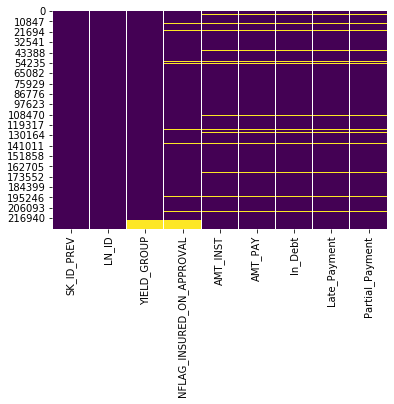

In [39]:
Record_Data = prev_app.merge(Merged_DF, left_on=["SK_ID_PREV", "LN_ID"], right_on = ["SK_ID_PREV", "LN_ID"], how = "outer")
sns.heatmap(Record_Data.isnull(), cbar=False,cmap='viridis')

In [40]:
Record_Data.Late_Payment.fillna(0, inplace = True) # replace NaN by 0 as there is no record about their bad history
Record_Data.Partial_Payment.fillna(0, inplace = True)
Record_Data.In_Debt.fillna(0, inplace = True)
Record_Data

,SK_ID_PREV,LN_ID,YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL,AMT_INST,AMT_PAY,In_Debt,Late_Payment,Partial_Payment
0,2030495,271877,middle,0.0,17284.275,17284.275,0.0,0.0,0.0
1,2819243,176158,middle,1.0,563133.375,563133.375,0.0,0.0,0.0
2,1383531,199383,low_normal,1.0,419332.905,530447.535,0.0,0.0,0.0
3,1715995,447712,low_normal,1.0,437811.435,437811.435,0.0,0.0,0.0
4,1151694,161591,middle,0.0,234582.975,234582.975,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
227778,2842750,335992,NaN,NaN,55739.205,44580.285,1.0,2.0,4.0
227779,2842988,295841,NaN,NaN,2555.685,2555.685,0.0,0.0,0.0
227780,2843031,229571,NaN,NaN,307714.230,307714.230,0.0,0.0,0.0
227781,2843116,120745,NaN,NaN,101629.125,101629.125,0.0,0.0,0.0


In [41]:
Record_Data.drop(["YIELD_GROUP", "NFLAG_INSURED_ON_APPROVAL"], axis = 1, inplace = True) # temperarily drop those columns as we cannot aggregate with a meaning and there are missing values within them

In [42]:
Record_Data.head()

,SK_ID_PREV,LN_ID,AMT_INST,AMT_PAY,In_Debt,Late_Payment,Partial_Payment
0,2030495,271877,17284.275,17284.275,0.0,0.0,0.0
1,2819243,176158,563133.375,563133.375,0.0,0.0,0.0
2,1383531,199383,419332.905,530447.535,0.0,0.0,0.0
3,1715995,447712,437811.435,437811.435,0.0,0.0,0.0
4,1151694,161591,234582.975,234582.975,0.0,0.0,0.0


In [43]:
Record_Data = Record_Data.groupby("LN_ID")["Late_Payment", "In_Debt", "Partial_Payment"].agg({"Late_Payment":"sum", "In_Debt":"sum","Partial_Payment":["sum", "count"]})

C:\Users\kewen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [44]:
Record_Data.columns = Record_Data.columns.droplevel(0)

In [45]:
Record_Data.reset_index(inplace = True)

In [46]:
Record_Data

,LN_ID,sum,sum,sum,count
0,100009,1.0,0.0,0.0,8
1,100039,0.0,0.0,0.0,3
2,100044,6.0,2.0,6.0,4
3,100045,9.0,1.0,6.0,4
4,100046,0.0,0.0,0.0,1
...,...,...,...,...,...
72398,456247,5.0,0.0,0.0,5
72399,456248,4.0,1.0,8.0,4
72400,456249,0.0,0.0,0.0,1
72401,456252,1.0,0.0,0.0,1


In [47]:
Record_Data.columns=["LN_ID", "Late_Payment", "In_Debt", "Partial_Payment", "Num_Previous_Applications"]
Record_Data

,LN_ID,Late_Payment,In_Debt,Partial_Payment,Num_Previous_Applications
0,100009,1.0,0.0,0.0,8
1,100039,0.0,0.0,0.0,3
2,100044,6.0,2.0,6.0,4
3,100045,9.0,1.0,6.0,4
4,100046,0.0,0.0,0.0,1
...,...,...,...,...,...
72398,456247,5.0,0.0,0.0,5
72399,456248,4.0,1.0,8.0,4
72400,456249,0.0,0.0,0.0,1
72401,456252,1.0,0.0,0.0,1


# Part - 3: Data Preprocessing

In [48]:
train.columns

Index(['Unnamed: 0', 'LN_ID', 'TARGET', 'CONTRACT_TYPE', 'GENDER',
       'NUM_CHILDREN', 'INCOME', 'APPROVED_CREDIT', 'ANNUITY', 'PRICE',
       'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'DAYS_AGE',
       'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY',
       'HOUR_APPLY', 'ORGANIZATION_TYPE', 'EXT_SCORE_1', 'EXT_SCORE_2',
       'EXT_SCORE_3'],
      dtype='object')

In [49]:
def Data_Preprocessing(Record_Data, Data):
    Drop_Columns = ["Unnamed: 0", "APPROVED_CREDIT", "WEEKDAYS_APPLY", "HOUR_APPLY", "ORGANIZATION_TYPE", "EXT_SCORE_1", "EXT_SCORE_3"]
    Data = Data.drop(Drop_Columns, axis = 1, inplace = False) # remove columns with duplicate info to avoid multicolinearity
    Data_0 = Data.merge(Record_Data, left_on=["LN_ID"], right_on = ["LN_ID"], how = "left")
    if Data_0[["Late_Payment", "In_Debt", "Partial_Payment", "Num_Previous_Applications"]].isnull().values.any():
        Data_0[["Late_Payment", "In_Debt", "Partial_Payment", "Num_Previous_Applications"]] = Data_0[["Late_Payment", "In_Debt", "Partial_Payment", "Num_Previous_Applications"]].fillna(0)
    Data_0.replace({"INCOME_TYPE": {"Unemployed":"No Income",
                                "Student":"No Income",
                                "Working":"With Income",
                                "Commercial associate":"With Income",
                                "Pensioner":"With Income",
                                "Businessman":"With Income",
                                "State servant":"Stable Income"},
                 "EDUCATION": {"Academic degree":"High Education",
                               "Higher education":"High Education",
                               "Incomplete higher":"Low Education",
                               "Secondary / secondary special":"Low Education",
                               "Lower secondary":"Low Education"},
                 "FAMILY_STATUS": {"Civil marriage":"Married"}
                }, inplace = True)
    Cat_Columns = ["CONTRACT_TYPE", "GENDER", "INCOME_TYPE", "EDUCATION", "FAMILY_STATUS", "HOUSING_TYPE"]
    Data_1 = pd.get_dummies(data=Data_0, columns=Cat_Columns, drop_first=False)
    LN_ID = Data_1["LN_ID"]
    Y = Data_1.TARGET
    X = Data_1.drop(["LN_ID", "TARGET"], axis = 1)
    X_Scaled = pd.DataFrame(StandardScaler(copy = False).fit_transform(X), index=X.index, columns=X.columns)
    return(LN_ID, X_Scaled, Y)

In [50]:
Train_LN_ID, Train_X, Train_Y = Data_Preprocessing(Record_Data, train)
Test_LN_ID, Test_X, Test_Y = Data_Preprocessing(Record_Data, test)

### KNN for missing scoring values

In [51]:
# Training_X.isnull().sum()

In [52]:
imputer = KNNImputer(n_neighbors=10)

In [53]:
Train_X = pd.DataFrame(imputer.fit_transform(Train_X), index=Train_X.index, columns=Train_X.columns)

In [54]:
Test_X = pd.DataFrame(imputer.fit_transform(Test_X), index=Test_X.index, columns=Test_X.columns)

In [55]:
#Test_X.isnull().sum()

In [56]:
# Train_X.isnull().sum()

### SMOTE Algorithm for inbalanced data sampling

In [57]:
X_train, X_validation, Y_train, Y_validation = train_test_split(Train_X, Train_Y, test_size=0.1, random_state=0)
sm = SMOTE(random_state=0)
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train)

# Part - 4: Model Selection, Tuning and Training

## Select for best performance model by F1 score

In [58]:
models = {
    'rfc': RandomForestClassifier(random_state = 0),
    'gbc': GradientBoostingClassifier(random_state = 0),
    'lr': LogisticRegression(random_state = 0)}
f1_scores = dict()

In [59]:
# Running this will take about 3 minutes
"""
f1_scores = dict()
for clf_name in models:
    print(clf_name)
    clf = models[clf_name]
    clf.fit(X_train_res, Y_train_res)
    Y_pred = clf.predict(X_validation)
    print(f1_score(Y_pred, Y_validation))
"""

'\nf1_scores = dict()\nfor clf_name in models:\n    print(clf_name)\n    clf = models[clf_name]\n    clf.fit(X_train_res, Y_train_res)\n    Y_pred = clf.predict(X_validation)\n    print(f1_score(Y_pred, Y_validation))\n'

In [60]:
"""
The Result of Model Selection:
rfc
0.1056
gbc
0.18409090909090908
lr
0.22600963319748055
"""

'\nThe Result of Model Selection:\nrfc\n0.1056\ngbc\n0.18409090909090908\nlr\n0.22600963319748055\n'

#### *** Based on the F1 scores, I selected Logistic regression for the machine learning model

### Check the importance of features

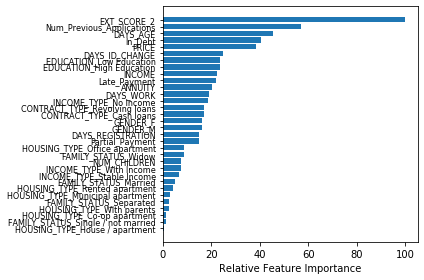

In [61]:
model = LogisticRegression(random_state = 0)
model.fit(X_train_res, Y_train_res)

feature_importance = abs(model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train_res.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

#### *** The Top 3 most important factors are: 1. EXT_SCORE_2; 2. Num_Previous_Applications(by Feature Engineering); 3. DAYS_AGE

In [62]:
# Use all the train data set to train Logistic model
sm = SMOTE(random_state=0)
Train_X_res, Train_Y_res = sm.fit_sample(Train_X, Train_Y)

In [63]:
def Parameter_Tuning(Train_X, Train_Y):
    C = np.logspace(0, 3, 5)
    max_iter=[80, 100,140]
    penalty = ['l1', 'l2']
    # Create hyperparameter options
    hyperparameters = dict(C=C, penalty=penalty, max_iter=max_iter)

    # Fit grid search
    best_model = GridSearchCV(LogisticRegression(solver='liblinear', random_state = 0), hyperparameters, cv=5, verbose=True).fit(Train_X, Train_Y)

    # View best hyperparameters
    print("Best: %f using %s" % (best_model.best_score_, best_model.best_params_))    
    return(best_model)

In [64]:
# Tuning process will take 4.9 minutes. With more time, we could look into more tuning parameters and methods to improve accuracy
'''
Model = Parameter_Tuning(Train_X_res, Train_Y_res) #Create regularization hyperparameter space
'''

'\nModel = Parameter_Tuning(Train_X_res, Train_Y_res) #Create regularization hyperparameter space\n'

### The best score is 0.655676 using {'C': 1.0, 'max_iter': 80, 'penalty': 'l1'}

In [65]:
Model = LogisticRegression(solver='liblinear', random_state=0, C = 1, max_iter = 80, penalty = "l1").fit(Train_X_res, Train_Y_res)
print("Training LR.score is:", Model.score(Train_X_res, Train_Y_res))

Training LR.score is: 0.6560476881168854


# Part - 5: Evaluation Metrics

In [66]:
Y_pred = Model.predict(Test_X)

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Test_Y, Y_pred)
confusion_matrix

array([[8943, 4615],
       [ 465,  738]], dtype=int64)

In [68]:
True_Positive = confusion_matrix[0][0]
False_Positive = confusion_matrix[0][1]
False_Negative = confusion_matrix[1][0]
True_Negative = confusion_matrix[1][1]
print("\n", "True_Positive is: ",True_Positive, "\n",
    "False_Positive is：", False_Positive, "\n",
    "False_Negative is:", False_Negative, "\n",
    "True_Negative is:", True_Negative, "\n")


 True_Positive is:  8943 
 False_Positive is： 4615 
 False_Negative is: 465 
 True_Negative is: 738 



In [69]:
precision = True_Positive / (True_Positive + False_Positive)
recall = True_Positive / (True_Positive + False_Negative)
print("The precision for testing data is :", precision)
print("The recall for testing data is :", recall)

The precision for testing data is : 0.659610562029798
The recall for testing data is : 0.9505739795918368


In [70]:
f1 = 2*((precision*recall)/(precision+recall))
print("The F1 score for testing data is:", f1)

The F1 score for testing data is: 0.7788034485761561


In [71]:
print("Accuracy score for the testing data is:", accuracy_score(Test_Y, Y_pred))

Accuracy score for the testing data is: 0.6558498746697379


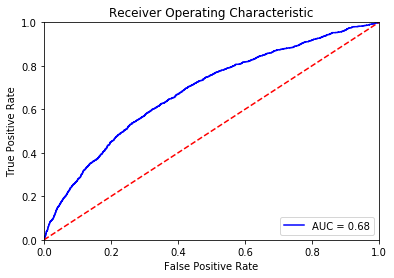

In [72]:
# AUC and ROC curve
fpr, tpr, threshold = metrics.roc_curve(Test_Y, Model.predict_proba(Test_X)[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Part - 6: The Output: Reference Data

In [73]:
Credit_Score = Model.predict_proba(Test_X)
Credit_Score = Credit_Score[:, 0] # probability of TARGET == 0

In [74]:
Data_Prediction = pd.concat({"LN_ID":Test_LN_ID, "Predicted_TARGET":pd.Series(Y_pred), "TARGET":Test_Y, "Predicted_Credit_Score":pd.Series(Credit_Score)}, axis=1)

In [75]:
Data_Prediction.head(10) # Predicted_Credit_Score for ranking clients

,LN_ID,Predicted_TARGET,TARGET,Predicted_Credit_Score
0,219092,1,0,0.243587
1,141577,0,0,0.763788
2,180205,0,0,0.681491
3,357381,1,0,0.234564
4,271229,0,0,0.559127
5,374711,1,0,0.130624
6,400364,0,0,0.612424
7,133189,0,0,0.645379
8,146009,0,0,0.649833
9,327796,1,0,0.450621


In [76]:
'''
Data_Prediction is the final output includes:
Column1: "LN_ID": The UEN for the applicant 
Column2: "Predicted_TARGET": The predicted TARGET variable for credit, 0 means approve, 1 means reject
Column3: "TARGET": The actual/original TARGET variable
Column4: "Predicted_Credit_Score": the probablity of TARGET = 0, can be used to rank the customer's repayment capability.the higher, the more likely the customer repay loan in time.
'''

'\nData_Prediction is the final output includes:\nColumn1: "LN_ID": The UEN for the applicant \nColumn2: "Predicted_TARGET": The predicted TARGET variable for credit, 0 means approve, 1 means reject\nColumn3: "TARGET": The actual/original TARGET variable\nColumn4: "Predicted_Credit_Score": the probablity of TARGET = 0, can be used to rank the customer\'s repayment capability.the higher, the more likely the customer repay loan in time.\n'

### *** Further improvement: 1. More Feature Engineering and Data cleaning; 2. Fine Tuning hyperparameters; 3. Slightly adjust the classification threshold to balance the ratio between false positive and false negative(this depends on which false prediction brings more damage to the company/business). 

### Reference:

In [77]:
# https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
# https://www.kaggle.com/devghiles/step-by-step-solution-with-f1-score-as-a-metric